# Principal Component Analysis (PCA)

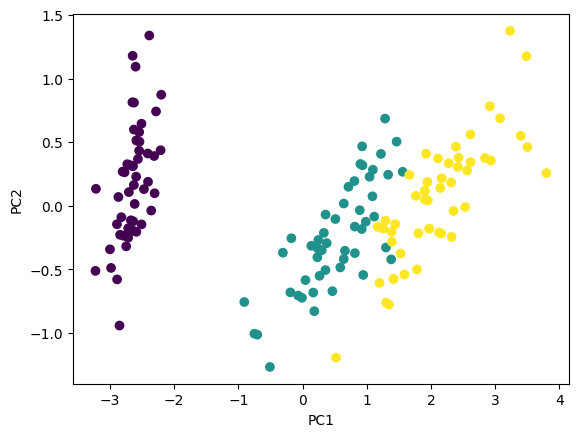

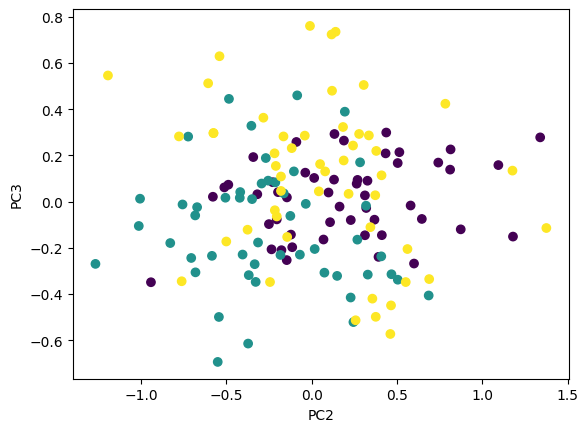

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions like pc1 and pc2
pca = PCA(n_components=3) 

# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)

# Now we can plot the 1 and 2 principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2') 
plt.ylabel('PC3')
plt.show()

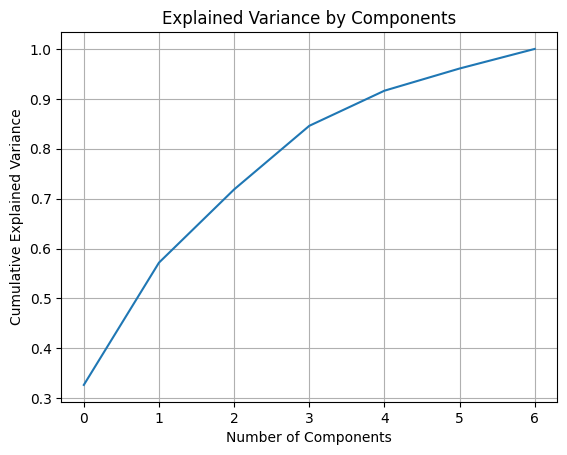

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.531650  0.189111  0.036649 -0.156579 -0.281249   
tip         0.133642  0.178333 -0.152571 -0.335732  0.660434  0.556479   
sex         0.164816  0.159316 -0.588523  0.724260 -0.047053  0.266919   
smoker      0.061756 -0.010375  0.762364  0.501763  0.229846  0.297170   
day        -0.058183 -0.637807  0.000506  0.212334  0.003218 -0.004329   
time        0.378659 -0.274214 -0.115541  0.111732  0.606759 -0.572115   
size        0.686390 -0.421978  0.007162 -0.228151 -0.340735  0.352618   

                 PC7  
total_bill  0.493317  
tip         0.261729  
sex        -0.055523  
smoker     -0.148236  
day         0.738039  
time       -0.245190  
size       -0.241370  


In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# load the dataset
tips = sns.load_dataset('tips')

# encodeing the categorical columns
le = LabelEncoder()

cat_features= tips.select_dtypes(include=['category']).columns

for features in cat_features:
    tips[features] = le.fit_transform(tips[features]) 

# Standardizing the data
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

# applying PCA
pca = PCA()
tips_pca = pca.fit_transform(tips_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


# Create a Dataframe to show the loadings
loadings = pd.DataFrame(pca.components_, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

<Axes: xlabel='PC1', ylabel='PC2'>

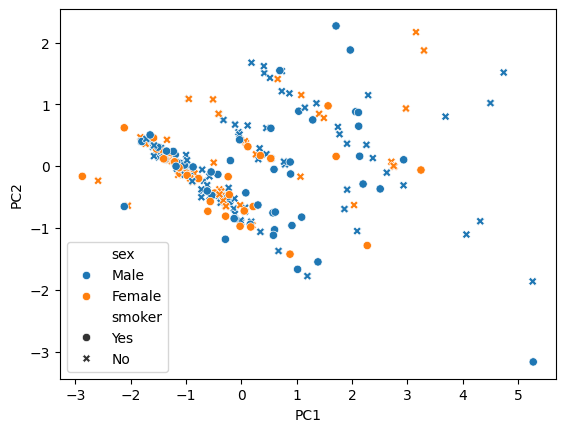

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

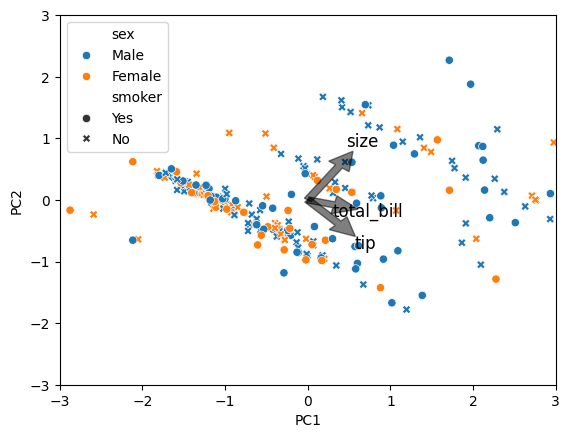

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

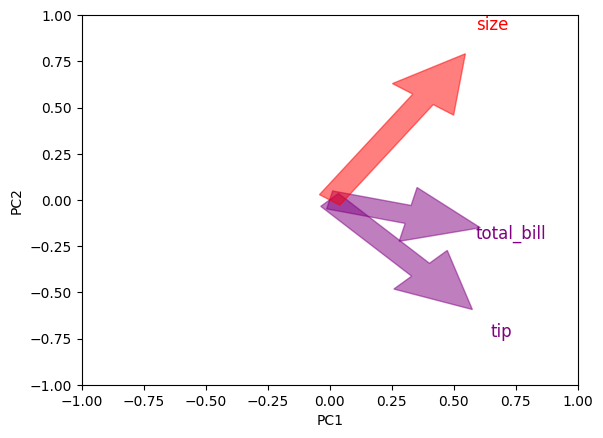

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()